In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
color = sns.color_palette()

Populating the interactive namespace from numpy and matplotlib


Tests groupby

In [3]:
df = pd.DataFrame({
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })

In [4]:
df

,A,B,C,D
0,foo,one,0.327524,1.526572
1,bar,one,-0.993172,-0.177472
2,foo,two,0.036681,0.483991
3,bar,three,-0.235329,-1.686586
4,foo,two,1.086501,-2.205616
5,bar,two,0.402314,0.161432
6,foo,one,1.100179,-0.954813
7,foo,three,0.221919,0.755820


In [19]:
grouped = df.groupby('A')
grouped.groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [6]:
grouped = df.groupby(['A', 'B'])
grouped.groups

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

In [15]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4], 'Z': ['a', 'b', 'c', 'd'], 'W': [23, 34, 45, 56]})
df2

,W,X,Y,Z
0,23,B,1,a
1,34,B,2,b
2,45,A,3,c
3,56,A,4,d


In [16]:
df2.groupby(['X']).sum()

,W,Y
X,,
A,101,7
B,57,3


A         Axes(0.1,0.15;0.363636x0.75)
B    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

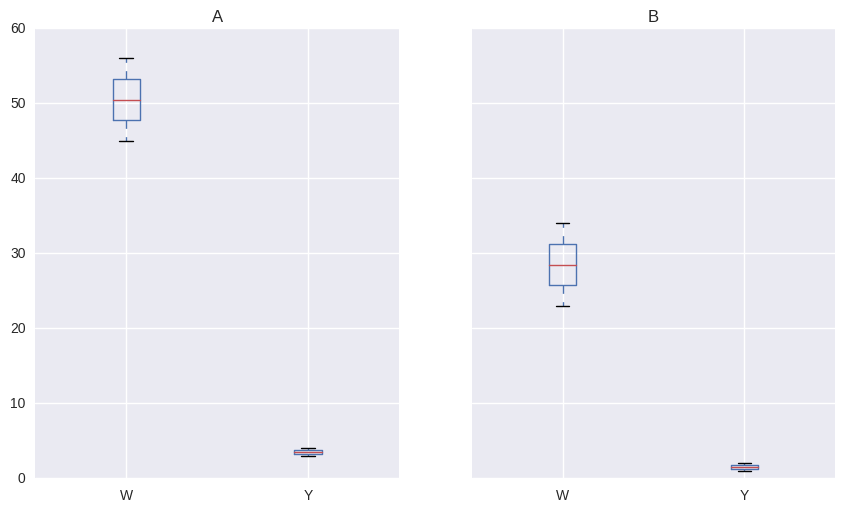

In [23]:
gb = df2.groupby(['X'])
gb.boxplot()

In [25]:
print gb.agg('mean')
print gb.agg('size')

      W    Y
X           
A  50.5  3.5
B  28.5  1.5
X
A    2
B    2
dtype: int64


In [27]:
v = gb.agg('size').value_counts()
print v
print v.index, v.values

2    2
dtype: int64
Int64Index([2], dtype='int64') [2]


In [7]:
df = pd.DataFrame({
        'income' : [ 1.2,  2.5,  np.nan, 3.1,  2.12,  2, np.nan,  np.nan, 3.22,  1.14,  2.58,  1.65,  2.8, np.nan,  np.nan,   1.27,  2.88,  3.6,  4.33, np.nan,  np.nan,  np.nan, np.nan, 3.11, 5.2, 7.8, 2.2, 4.5],
        'gender' : ['M', 'W', 'W', 'M', 'W', 'M', 'M', 'W', 'M', 'M', 'W', 'W', 'M', 'W', 'M', 'W', 'W', 'W', 'W', 'W', 'M', 'M', 'W', 'M', 'M', 'M', 'M', 'M'],
        'region' : ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D'],
        'rnd': np.random.rand(28)
    })

In [8]:
df

,gender,income,region,rnd
0,M,1.20,A,0.552737
1,W,2.50,A,0.280642
2,W,NaN,A,0.132452
3,M,3.10,A,0.458549
4,W,2.12,B,0.389160
5,M,2.00,B,0.857329
6,M,NaN,B,0.892347
7,W,NaN,B,0.803510
8,M,3.22,B,0.347378
9,M,1.14,B,0.238433


In [9]:
df['income'].isnull().sum()

9

In [10]:
income_stats_gb = df[df['income'].notnull()].groupby(['region', 'gender'])
nan_income_stats_gb = df[df['income'].isnull()].groupby(['region', 'gender'])

In [11]:
#income_stats = income_stats_gb.agg({'income': {'median': median, 'min': min, 'max': max}})
income_median = income_stats_gb.agg('median')
nan_incomes_stats = nan_income_stats_gb.agg("size")

In [12]:
#income_stats
income_median

income       rnd
region gender                  
A      M         2.15  0.505643
       W         2.50  0.280642
B      M         2.00  0.347378
       W         2.35  0.282049
C      M         2.80  0.662413
       W         1.46  0.304859
D      M         4.50  0.361107
       W         3.60  0.263142

In [13]:
nan_incomes_stats

region  gender
A       W         1
B       M         1
        W         1
C       M         1
        W         1
D       M         2
        W         2
dtype: int64

In [14]:
for key, group_value in nan_income_stats_gb:
    print key
    print group_value.index[0]
    #print income_stats.loc[key]['income']
    print income_median.loc[key]['income']
    #df.loc[group_value.index, 'income'] = income_stats.loc[key]['income']['median']
    df.loc[group_value.index, 'income'] = income_median.loc[key]['income']

('A', 'W')
2
2.5
('B', 'M')
6
2.0
('B', 'W')
7
2.35
('C', 'M')
14
2.8
('C', 'W')
13
1.46
('D', 'M')
20
4.5
('D', 'W')
19
3.6


In [15]:
df

,gender,income,region,rnd
0,M,1.20,A,0.552737
1,W,2.50,A,0.280642
2,W,2.50,A,0.132452
3,M,3.10,A,0.458549
4,W,2.12,B,0.389160
5,M,2.00,B,0.857329
6,M,2.00,B,0.892347
7,W,2.35,B,0.803510
8,M,3.22,B,0.347378
9,M,1.14,B,0.238433


In [16]:
l = [1,2,3,5,7,9]
#df[~df.index.isin(l)]
#reduced_df = df.drop(~df.index.isin(l))

In [17]:

def foo(df2, ll):
    df2.drop(df[~df.index.isin(l)].index, inplace=True)
    
print df.shape
foo(df, l)
print df.shape


(28, 4)
(6, 4)


In [18]:
df

,gender,income,region,rnd
1,W,2.50,A,0.280642
2,W,2.50,A,0.132452
3,M,3.10,A,0.458549
5,M,2.00,B,0.857329
7,W,2.35,B,0.803510
9,M,1.14,B,0.238433


In [20]:
df.to_csv('test.csv', index=False, index_label=False)

In [7]:
np.random.randint(2, size=(20))

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [111]:
ll = 50
df = pd.DataFrame({'A': np.random.randint(2, size=(ll)), 
                   'B': np.random.randint(2, size=(ll)), 
                   'C': np.random.randint(2, size=(ll))})

In [112]:
df.head()

,A,B,C
0,1,1,0
1,1,1,1
2,0,1,0
3,0,1,0
4,0,1,0


In [113]:
def dummies_to_decimal(row):
    output = ''
    for v in row.values:
        output += str(v)
    return int(output,2)

In [114]:
df['value'] = df.apply(dummies_to_decimal, axis=1)

In [115]:
df.head()

,A,B,C,value
0,1,1,0,6
1,1,1,1,7
2,0,1,0,2
3,0,1,0,2
4,0,1,0,2


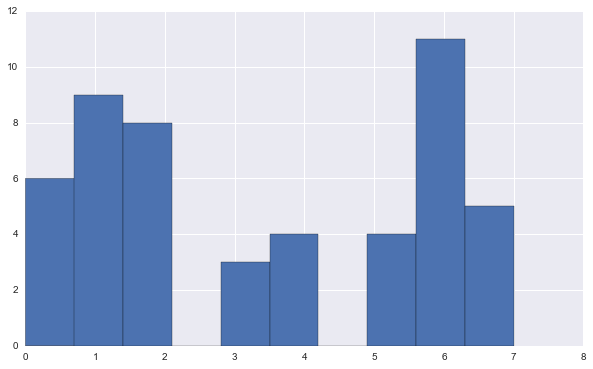

In [117]:
df['value'].hist()

In [28]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(norm_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [33]:
kmeans.labels_

array([2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1], dtype=int32)

In [34]:
kmeans.cluster_centers_

array([[ 0.2  ,  0.45 , -0.25 ],
       [-0.55 ,  0.325,  0.5  ],
       [ 0.45 , -0.55 , -0.375]])

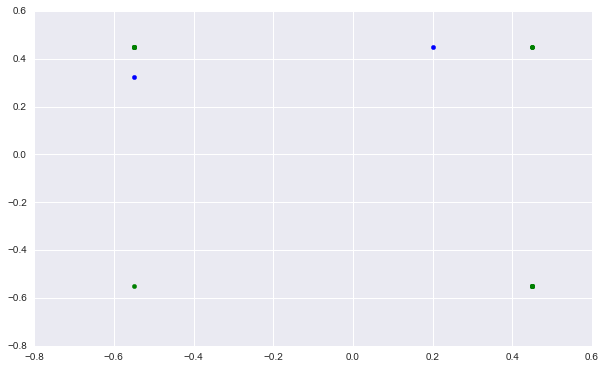

In [40]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='blue')
plt.scatter(norm_df['A'], norm_df['B'], color='green')


In [2]:
import math

In [13]:
yearmonth_begin = 201508
nb_months = 18

In [23]:
def to_yearmonth_str(yearmonth):
    year = int(math.floor(yearmonth * 0.01))
    month = yearmonth - year*100
    return "%s-%s" % (str(year), str(month).zfill(2))

year = int(math.floor(yearmonth_begin * 0.01)) * 100
print yearmonth_begin, nb_months, year
dates = [to_yearmonth_str(yearmonth_begin), ]
current_yearmonth = yearmonth_begin
for i in range(1, nb_months):
    current_yearmonth += 1
    if current_yearmonth - year > 12:        
        year += 100
        current_yearmonth = year + 1
    dates.append(to_yearmonth_str(current_yearmonth))

print dates

201508 18 201500
['2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01']


In [25]:
test = '2017-05-28'
yearmonth_str = test[:7]

if yearmonth_str in dates:
    print "YES"
else:
    print "NO"

NO


In [27]:
test = '2015-01-28'

def _to_yearmonth(yearmonth_str):
    yearmonth = int(yearmonth_str[:7].replace('-', ''))
    return yearmonth

print _to_yearmonth(test)


201501


In [28]:
data = ['', 'NA', 'replace_me']
(a, b, c) = data
a = 'NA'
print data

['', 'NA', 'replace_me']


In [ ]:
d1 = 201501
d2 = 200001
res = d1*0.01 - d2*0.01
print res, int(math.floor(res)), int(math.floor(res)) * 12, int(math.ceil((res - int(res)) * 100))
int(math.floor(res)) * 12 + int(math.ceil((res - int(res)) * 100))

In [2]:
from collections import defaultdict

In [3]:
d = defaultdict(lambda: defaultdict(float))
d[0] = [0,1,0,0]
d[1] = [1,0,2,0]
d[3] = [0,2,3,0]
d[4] = [0,0,2,0]
d[5] = [0,1,2,2]


In [4]:
d2 = defaultdict(lambda: defaultdict(float))
d2[1] = [0,1,0,0]
d2[3] = [2,1,0,0]
d2[5] = [1,1,0,1]

In [5]:
print d
print d2

defaultdict(<function <lambda> at 0x7fb9bb164500>, {0: [0, 1, 0, 0], 1: [1, 0, 2, 0], 3: [0, 2, 3, 0], 4: [0, 0, 2, 0], 5: [0, 1, 2, 2]})
defaultdict(<function <lambda> at 0x7fb9bb1645f0>, {1: [0, 1, 0, 0], 3: [2, 1, 0, 0], 5: [1, 1, 0, 1]})


In [6]:
d3 = d2.copy()

In [7]:
d3[6] = [0,0,0,0]

In [8]:
d2

defaultdict(<function __main__.<lambda>>,
            {1: [0, 1, 0, 0], 3: [2, 1, 0, 0], 5: [1, 1, 0, 1]})

In [9]:
d3

defaultdict(<function __main__.<lambda>>,
            {1: [0, 1, 0, 0],
             3: [2, 1, 0, 0],
             5: [1, 1, 0, 1],
             6: [0, 0, 0, 0]})

In [10]:
for i in d3:
    for j in d3[i]:
        /= 10.0

TypeError: unsupported operand type(s) for /=: 'list' and 'float'

In [12]:
d4 = defaultdict(lambda: defaultdict(float))
d4['a']['b'] += 1

In [13]:
d4

defaultdict(<function __main__.<lambda>>,
            {'a': defaultdict(float, {'b': 1.0})})